In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

C:\Users\shisk\anaconda3\envs\tsa_course\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [7]:
df = pd.read_csv('Data/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
# getting a date time index
df['date'] = pd.to_datetime({'year':df['year'], 'month':df['month'], 'day':1})
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.2 KB


In [10]:
df = df.set_index('date')
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [11]:
df.index.freq = 'MS'

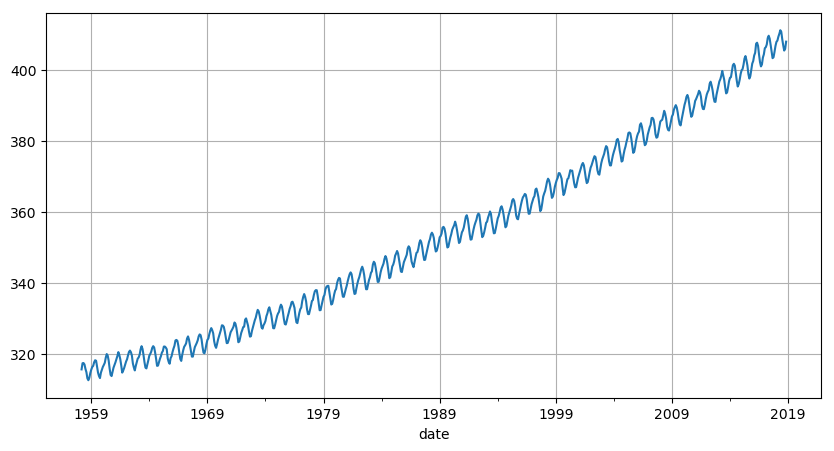

In [13]:
df['interpolated'].plot(figsize = (10, 5), grid = True)

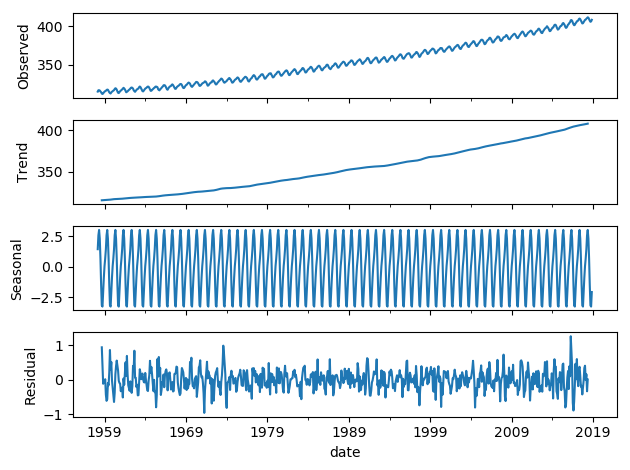

In [15]:
result = seasonal_decompose(df['interpolated'], model = 'add')
result.plot();

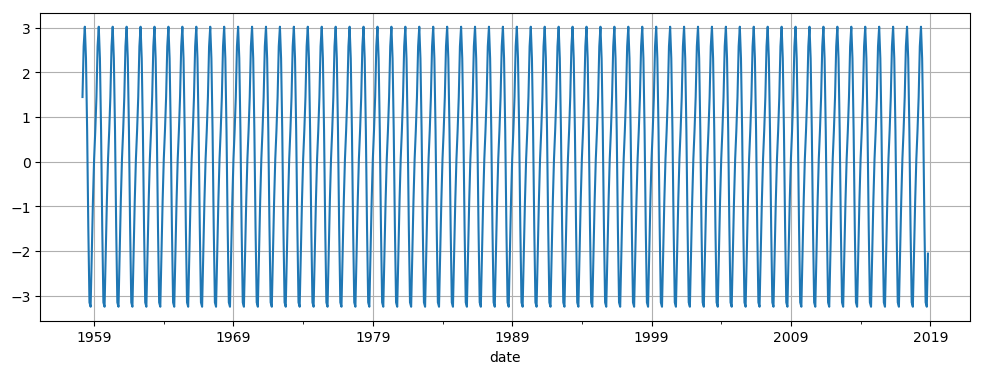

In [18]:
result.seasonal.plot(figsize = (12, 4), grid = True)
'''
we can see that this is a yearly seasonal data so the seasonality is 12 months
'''

In [19]:
auto_arima(df['interpolated'], seasonal = True, m = 12).summary() # seasonality is 12 months
'''
for SARIMA we need order for seasonality trend too
'''

C:\Users\shisk\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\shisk\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\shisk\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\shisk\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\shisk\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -203.092
Date:                            Sat, 26 Aug 2023   AIC                            420.183
Time:                                    16:48:13   BIC                            452.315
Sample:                                         0   HQIC                           432.582
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.449      0.147      -0.000       0.002
ma.L1         -0.3577      0.037     -9.728      0.000      -0.430      -0.286
ma.L2         -0.0310      0.038     -0.813      0.416      -0.106       0.044
ma.L3         -0.0865      0.037     -2.349      0.019      -0.159      -0.014
ar.S.L12       0.9994      0.000   2999.488      0.000       0.999       1.000
ma.S.L12      -0.8695      0.021    -42.160      0.000      -0.910      -0.829
sigma2         0.0958      0.005     20.352      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       45.20   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.26   Prob(JB):                         0.13
Heteroskedasticity (H):               1.11   Skew:                             0.01
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
train = df['interpolated'].iloc[:717]
test = df['interpolated'].iloc[717:]

In [22]:
model = SARIMAX(train, order=(0, 1, 3), seasonal_order=(1, 0, 1, 12)).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -201.201
Date:                            Sat, 26 Aug 2023   AIC                            414.402
Time:                                    16:50:17   BIC                            441.845
Sample:                                03-01-1958   HQIC                           424.999
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3543      0.035    -10.200      0.000      -0.422      -0.286
ma.L2         -0.0244      0.038     -0.648      0.517      -0.098       0.050
ma.L3         -0.0866      0.032     -2.686      0.007      -0.150      -0.023
ar.S.L12       0.9997      0.000   3239.481      0.000       0.999       1.000
ma.S.L12      -0.8680      0.022    -38.921      0.000      -0.912      -0.824
sigma2         0.0949      0.005     20.315      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       43.96   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Test Prediction

In [24]:
start = len(train)
end = start + len(test) - 1

In [25]:
pred = model.predict(start, end, typ='levels').rename('SARIMA Predictions')

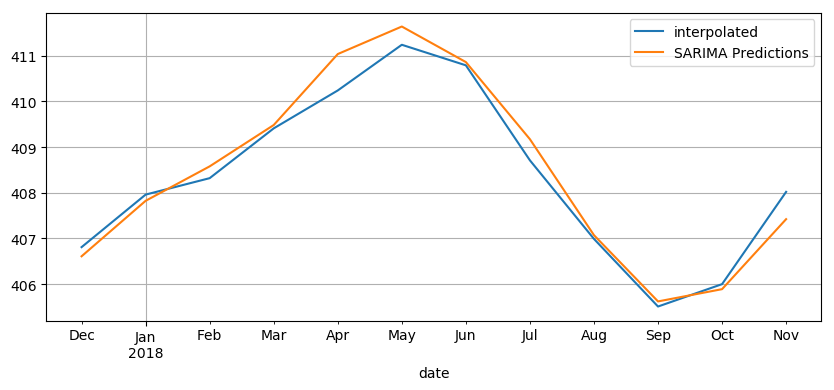

In [26]:
test.plot(figsize = (10, 4), legend = True)
pred.plot(legend = True, grid = True)

In [27]:
from statsmodels.tools.eval_measures import rmse

In [28]:
rmse(test, pred)

0.3573697479923076

In [29]:
test.mean()

408.3333333333333

In [30]:
pred.mean()

408.434276168007

### Forecasting into the Future

In [31]:
model = SARIMAX(df['interpolated'], order=(0, 1, 3), seasonal_order=(1, 0, 1, 12)).fit()

In [34]:
fcast = model.predict(start = len(df), end = len(df) + 33, typ='levels').rename('SARIMAX Forecast')

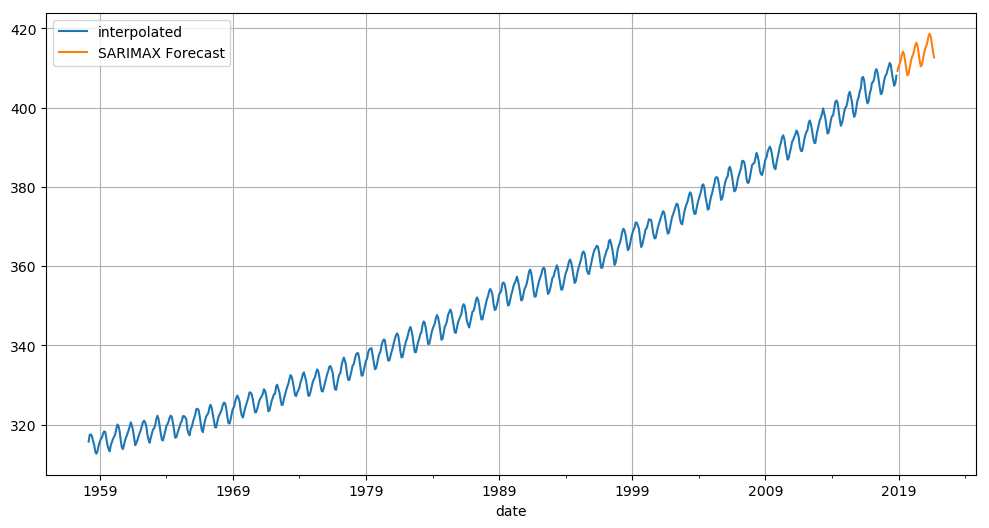

In [35]:
df['interpolated'].plot(figsize = (12, 6), legend = True)
fcast.plot(legend = True, grid = True)